In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [33]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
## for data
import pandas as pd

import re
import nltk## for language detection

In [35]:
# train = pd.read_csv('c:/data/project/train.csv')
# test = pd.read_csv('c:/data/project/test.csv')

train = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

train.head()

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [36]:
df = train[['facts', 'first_party_winner']]
df_target = df[['first_party_winner']]
df_nlp = df[['facts']]
df_nlp1 = pd.DataFrame(df_nlp, columns=['facts'])
df_nlp1['facts'] = df_nlp1['facts'].str.replace(r'<[^<>]*>', '', regex=True)
df_nlp1


,facts
0,"On June 27, 1962, Phil St. Amant, a candidate ..."
1,Ramon Nelson was riding his bike when he suffe...
2,An Alabama state court convicted Billy Joe Mag...
3,Victor Linkletter was convicted in state court...
4,"On April 24, 1953 in Selma, Alabama, an intrud..."
...,...
2473,Congress amended the Clean Air Act through the...
2474,"Alliance Bond Fund, Inc., an investment fund, ..."
2475,"In 1992, the District Court sentenced Manuel D..."
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per..."


In [37]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [38]:
corpus = df_nlp1['facts']
# print(corpus.str.cat(sep=" ")) # 인덱스의 요소들 서로 잇기
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

In [39]:
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

In [40]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [41]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    import re
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [42]:
df_nlp1["facts_clean"] = df_nlp1["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [43]:
df_nlp1

,facts,facts_clean
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [44]:
df_nlp2 = pd.concat([df_nlp1,df_target['first_party_winner']],axis=1, join='inner')
df_nlp2

,facts,facts_clean,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...,1
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...,0
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...,1
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...,1
...,...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...,1
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...,1
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...,0
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...,0


In [45]:
df_nlp2['first_party_winner'].value_counts()


first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

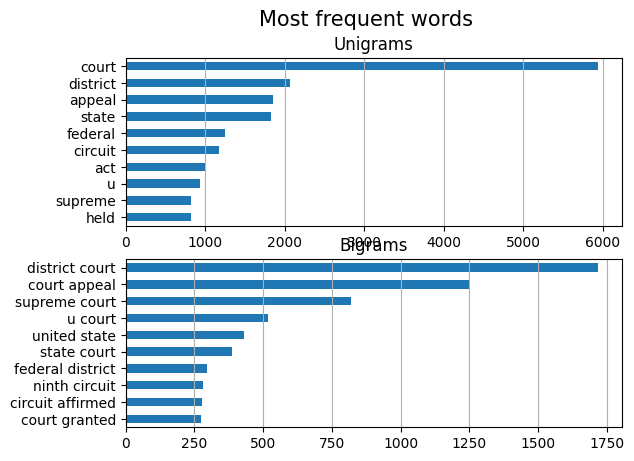

In [47]:
y = 1
corpus = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
#figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

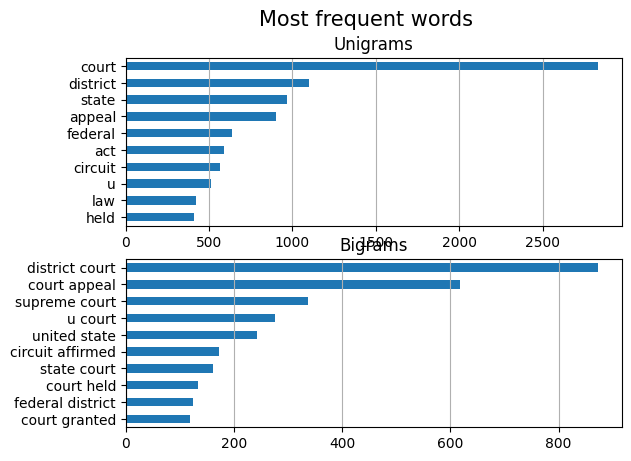

In [48]:
y = 0
corpus = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
#figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
dtf_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [49]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [50]:
import wordcloud

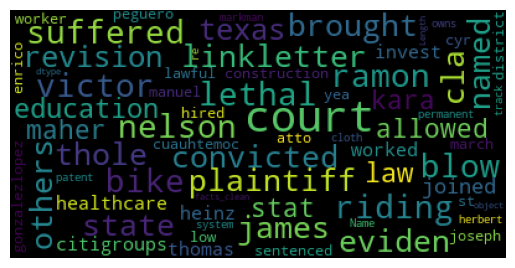

In [51]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [52]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [53]:
import gensim
import gensim.downloader as gensim_api
import seaborn as sns

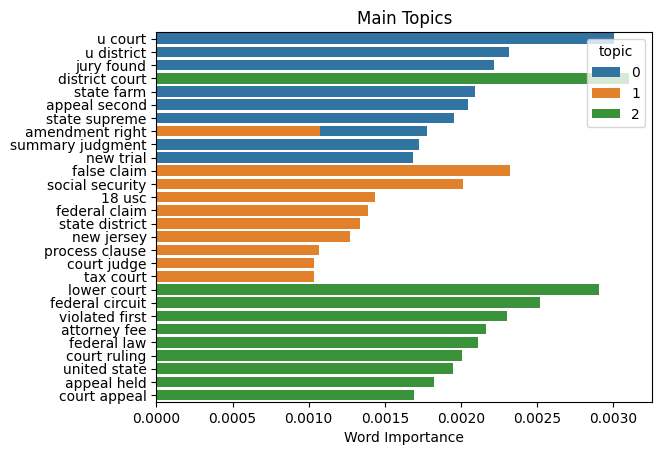

In [54]:
y = 1
corpus = df_nlp2[df_nlp2["first_party_winner"]==y]["facts_clean"]
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] ## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=7, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])

## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

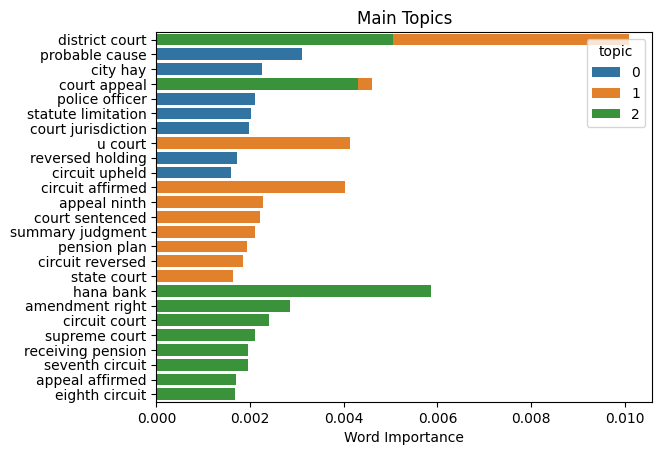

In [55]:
y = 0
corpus = df_nlp2[df_nlp2["first_party_winner"]==y]["facts_clean"]
## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] ## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=7, random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])

## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
vectorizer = CountVectorizer()

In [59]:
df_nlp2 = pd.concat([df_nlp1,df_target['first_party_winner']],axis=1, join='inner')

In [60]:
x_train = df_nlp2['facts_clean']
y_train = df_nlp2['first_party_winner']

test

,ID,first_party,second_party,facts
0,TEST_0000,Salerno,United States,The 1984 Bail Reform Act allowed the federal c...
1,TEST_0001,Milberg Weiss Bershad Hynes and Lerach,"Lexecon, Inc.",Lexecon Inc. was a defendant in a class action...
2,TEST_0002,No. 07-582\t Title: \t Federal Communications ...,"Fox Television Stations, Inc., et al.","In 2002 and 2003, Fox Television Stations broa..."
3,TEST_0003,Harold Kaufman,United States,During his trial for armed robbery of a federa...
4,TEST_0004,Berger,Hanlon,"In 1993, a magistrate judge issued a warrant a..."
...,...,...,...,...
1235,TEST_1235,"Haitian Centers Council, Inc., et al.","Chris Sale, Acting Commissioner, Immigration A...",According to Executive Order No. 12807 signed ...
1236,TEST_1236,Whitman,"American Trucking Associations, Inc.",Section 109(a) of the Clean Air Act (CAA) requ...
1237,TEST_1237,Linda A. Matteo and John J. Madigan,William G. Barr,Linda Matteo and John Madigan created a plan f...
1238,TEST_1238,Washington State Apple Advertising Commission,Hunt,"In 1972, the North Carolina Board of Agricultu..."


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(xfeatures,ylabel, test_size=0.25)

In [ ]:
pipe = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(solver='liblinear'))])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(solver='liblinear'))])

In [ ]:
pipe.score(X_test,y_test)

0.5935483870967742

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipe1= Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier())])

In [ ]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])

In [ ]:
pipe1.score(X_train,y_train)

1.0

In [ ]:
pipe1.score(X_test,y_test)

0.6435483870967742

In [ ]:
pipe2= Pipeline(steps=[('cv',CountVectorizer()),('rf',KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe2.score(X_train,y_train)

0.871367061356297

In [ ]:
pipe2.score(X_test,y_test)

0.582258064516129

In [ ]:
vectorize=CountVectorizer()

In [ ]:
count_matrix = vectorize.fit_transform(df_nlp2['facts_clean'])
count_array = count_matrix.toarray()
data_final = pd.DataFrame(data=count_array,columns = vectorize.get_feature_names_out())
data_final


,011119,0125,02,036539,04,041352,041581,0479,05,0511287,...,zj,zone,zoned,zoneofinterests,zoning,zubik,zuni,zurich,zurko,zurkos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_final = pd.concat([data_final,df_nlp2["first_party_winner"]],axis=1,join='inner')

In [ ]:
data_final

,011119,0125,02,036539,04,041352,041581,0479,05,0511287,...,zone,zoned,zoneofinterests,zoning,zubik,zuni,zurich,zurko,zurkos,first_party_winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_final.drop(columns=['first_party_winner']),
                                                    data_final['first_party_winner'], 
                                                    test_size=0.5,random_state=10)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
print(len(X_train))
print(len(X_train))

1239


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_final = scaler.fit_transform(data_final)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=200, random_state=0)
lda_data = lda.fit_transform(X_train)

In [ ]:
lda_data_train = pd.DataFrame(data=lda_data)

In [ ]:
lda_data_test = pd.DataFrame(data=lda.transform(X_test))

In [ ]:
rand=RandomForestClassifier(max_depth= 8, max_features = 100, min_samples_leaf = 2, n_estimators = 200)

In [ ]:
rand.fit(lda_data_train,y_train)

RandomForestClassifier(max_depth=8, max_features=100, min_samples_leaf=2,
                       n_estimators=200)

In [ ]:
rand.score(lda_data_train,y_train)

0.6981436642453591

In [ ]:
rand.score(lda_data_test,y_test)

0.6263115415657788

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_pred1 = rand.predict(lda_data_test)
f1_score(y_test, y_pred1)

0.7589796980739197

In [ ]:
print(len(lda_data_test))
print(len(lda_data_train))
print(len(y_train))

1239
1239
1239


In [ ]:
model = XGBClassifier()
model.fit(lda_data_train, y_train)
y_pred = model.predict(lda_data_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1_score(y_test, y_pred1)


Accuracy: 56.09%


0.7589796980739197

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(lda_data_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(lda_data_train,y_train)

0.7247780468119451

In [ ]:
knn.score(lda_data_test,y_test)

0.6238902340597255

In [ ]:
# predictions[-6]
len(predictions)
pd.DataFrame(predictions)

,0
0,0
1,1
2,0
3,1
4,1
...,...
1234,1
1235,1
1236,1
1237,1


In [ ]:
submit = pd.read_csv('C:/data/project/sample_submission.csv')
predcsv = pd.DataFrame(predictions,columns=['first_party_winner'])
# submit['first_party_winner'] = predictions
# predcsv
submit

,ID,first_party_winner
0,TEST_0000,0
1,TEST_0001,0
2,TEST_0002,0
3,TEST_0003,0
4,TEST_0004,0
...,...,...
1235,TEST_1235,0
1236,TEST_1236,0
1237,TEST_1237,0
1238,TEST_1238,0


In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit = predictions
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')

AttributeError: 'list' object has no attribute 'to_csv'

In [ ]:
# import numpy as np
# from keras.preprocessing import sequence
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
# n_unique_words = 10000 # cut texts after this number of words
# maxlen = 2000
# batch_size = 32

In [ ]:
# model = Sequential()
# model.add(Embedding(n_unique_words, 128, input_length=maxlen))
# model.add(LSTM(64))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# history=model.fit(lda_data_train, y_train,
#            batch_size=batch_size,
#            epochs=200,
#            validation_data=[lda_data_test, y_test])

Epoch 1/200


ValueError: in user code:

    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\user\miniconda3\envs\py\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 2000), found shape=(2, 200)


## Data Preprocessing

In [ ]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X

In [ ]:
tfidf_matrix = vectorizer.fit_transform(train['facts'])

from sklearn.metrics.pairwise import cosine_similarity
# 첫 번째와 두 번째 문장 비교
cos_similar = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("코사인 유사도 측정")
print(cos_similar)

코사인 유사도 측정
[[0.04744614]]


In [ ]:
tfidfv = TfidfVectorizer().fit(train['facts'])
print(tfidfv.vocabulary_)
print("="*100)
print(tfidfv.transform(train['facts']).toarray())
print("="*100)
print(tfidfv.fit_transform(train['facts']).toarray())

{'on': 11300, 'june': 8968, '27': 352, '1962': 233, 'phil': 11996, 'st': 14991, 'amant': 1383, 'candidate': 2920, 'for': 6763, 'public': 12745, 'office': 11251, 'made': 9834, 'television': 15696, 'speech': 14902, 'in': 8202, 'baton': 2158, 'rouge': 13907, 'louisiana': 9745, 'during': 5518, 'this': 15846, 'accused': 922, 'his': 7811, 'political': 12180, 'opponent': 11342, 'of': 11235, 'being': 2243, 'communist': 3652, 'and': 1456, 'involved': 8711, 'criminal': 4314, 'activities': 972, 'with': 17250, 'the': 15798, 'head': 7642, 'local': 9656, 'teamsters': 15662, 'union': 16453, 'finally': 6612, 'implicated': 8153, 'herman': 7738, 'thompson': 15850, 'an': 1433, 'east': 5570, 'deputy': 4845, 'sheriff': 14489, 'scheme': 14152, 'to': 15937, 'move': 10652, 'money': 10553, 'between': 2321, 'successfully': 15317, 'sued': 15326, 'defamation': 4640, 'first': 6651, 'circuit': 3355, 'court': 4233, 'appeals': 1564, 'reversed': 13694, 'holding': 7848, 'that': 15797, 'did': 5001, 'not': 11076, 'show':

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
tfidf_matrix = tfidfv.fit_transform(train['facts'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.04744614, 0.03722288, ..., 0.05230033, 0.14694784,
        0.0408811 ],
       [0.04744614, 1.        , 0.11354639, ..., 0.12967811, 0.07652896,
        0.08114463],
       [0.03722288, 0.11354639, 1.        , ..., 0.13816648, 0.07992237,
        0.06304225],
       ...,
       [0.05230033, 0.12967811, 0.13816648, ..., 1.        , 0.09202424,
        0.09930054],
       [0.14694784, 0.07652896, 0.07992237, ..., 0.09202424, 1.        ,
        0.06133021],
       [0.0408811 , 0.08114463, 0.06304225, ..., 0.09930054, 0.06133021,
        1.        ]])

In [ ]:
tfidfv.vocabulary_.keys()

dict_keys(['on', 'june', '27', '1962', 'phil', 'st', 'amant', 'candidate', 'for', 'public', 'office', 'made', 'television', 'speech', 'in', 'baton', 'rouge', 'louisiana', 'during', 'this', 'accused', 'his', 'political', 'opponent', 'of', 'being', 'communist', 'and', 'involved', 'criminal', 'activities', 'with', 'the', 'head', 'local', 'teamsters', 'union', 'finally', 'implicated', 'herman', 'thompson', 'an', 'east', 'deputy', 'sheriff', 'scheme', 'to', 'move', 'money', 'between', 'successfully', 'sued', 'defamation', 'first', 'circuit', 'court', 'appeals', 'reversed', 'holding', 'that', 'did', 'not', 'show', 'acted', 'malice', 'then', 'appealed', 'supreme', 'held', 'although', 'figures', 'forfeit', 'some', 'their', 'amendment', 'protection', 'from', 'crime', 'utter', 'disregard', 'whether', 'remarks', 'were', 'true', 'protects', 'uninhibited', 'robust', 'debate', 'rather', 'than', 'open', 'season', 'shoot', 'down', 'good', 'name', 'anyone', 'who', 'happens', 'be', 'servant', 'ramon', '

In [ ]:
#word_list = [i for i in sorted(tfidfv.vocabulary_.keys())]
word_list=tfidfv.vocabulary_.keys()
# vec_X_train을 DataFrame 화
pd.DataFrame(tfidf_matrix.toarray(), columns=word_list)
#pd.DataFrame(cosine_sim, columns=word_list)

,on,june,27,1962,phil,st,amant,candidate,for,public,...,processor,readable,optical,detectors,patentee,localize,spurious,westview,coded,province
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,0.0,0.046666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

## Define Model & Train

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

## Inference & Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')

Done
